In [ ]:
import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

sj_metadata = pd.read_csv('{}/sj_metadata.csv'.format(folder), index_col=0)
sj_metadata.head()

In [ ]:
exons_to_junctions = pd.read_csv('{}/exons_to_junctions_se.csv'.format(folder), index_col=[0, 1, 2], squeeze=True, header=None)

In [14]:
# exons_to_junctions['exon12'], exons_to_junctions['exon23'], exons_to_junctions['exon13'] = exons_to_junctions['junctions'].map(eval)
exons_to_junctions['junctions'] = exons_to_junctions['junctions'].map(eval)
exons_to_junctions.head()

,exon1,exon2,exon3,junctions
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-..."
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-..."
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-..."
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-..."
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-..."


In [15]:
junctions = exons_to_junctions['junctions'].apply(pd.Series).rename(
    columns={0:'junction_exon12', 1:'junction_exon23', 2: 'junction_exon13'})
exons_to_junctions = pd.concat([exons_to_junctions, junctions], axis=1)
exons_to_junctions.head()

,exon1,exon2,exon3,junctions,junction_exon12,junction_exon23,junction_exon13
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",chr10:100191049-100193696:-,chr10:100190428-100190887:-,chr10:100190428-100193696:-
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",chr10:100195172-100195391:-,chr10:100193849-100195028:-,chr10:100193849-100195391:-


In [18]:
exons_to_junctions['event_id'] = exons_to_junctions['exon1'] + '@' \
    + exons_to_junctions['exon2'] + '@' + \
    exons_to_junctions['exon3']
exons_to_junctions.head()

,exon1,exon2,exon3,junctions,junction_exon12,junction_exon23,junction_exon13,event
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",chr10:100191049-100193696:-,chr10:100190428-100190887:-,chr10:100190428-100193696:-,exon:chr10:100193697-100193848:-@exon:chr10:10...
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",chr10:100195172-100195391:-,chr10:100193849-100195028:-,chr10:100193849-100195391:-,exon:chr10:100195392-100195529:-@exon:chr10:10...


In [ ]:
exons_to_junctions = exons_to_junctions.set_index('event_id')

In [16]:
folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper'
sj = pd.read_csv('{}/sj_raw.csv'.format(folder))

sj['intron_location'] = sj.chrom.astype(str) + ':' \
    + sj.intron_start.astype(int).astype(str) + '-' \
    + sj.intron_stop.astype(int).astype(str) + ':' \
    + sj.strand.astype(str)
    
sj = sj.set_index(['intron_location', 'sample_id'])
sj.head()

,,chrom,intron_start,intron_stop,strand,intron_motif,annotated,unique_junction_reads,multimap_junction_reads,max_overhang
intron_location,sample_id,,,,,,,,,
chr1:1309283-1309379:-,CVN_09,chr1,1309283,1309379,-,GT/AG,True,37,0,49
chr1:1309826-1310084:-,CVN_09,chr1,1309826,1310084,-,GT/AG,True,43,0,49
chr1:1310171-1310533:-,CVN_09,chr1,1310171,1310533,-,GT/AG,True,27,0,47
chr1:1337637-1341188:-,CVN_09,chr1,1337637,1341188,-,GT/AG,True,409,0,50
chr1:1341267-1342288:-,CVN_09,chr1,1341267,1342288,-,GT/AG,True,337,0,50


In [26]:
inclusion_cols = ['junction_exon12', 'junction_exon23']
exclusion_cols = ['junction_exon13']
junction_cols = inclusion_cols + exclusion_cols


In [67]:
folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper'
sj = pd.read_csv('{}/sj_raw.csv'.format(folder))

sj['intron_location'] = sj.chrom.astype(str) + ':' \
    + sj.intron_start.astype(int).astype(str) + '-' \
    + sj.intron_stop.astype(int).astype(str) + ':' \
    + sj.strand.astype(str)
    
print sj.shape
sj = sj.drop_duplicates(['sample_id', 'intron_location'])
print sj.shape
    
sj = sj.set_index(['intron_location', 'sample_id'])
sj = sj.sort_index()
sj.head()

(7082563, 11)
(4580821, 11)


chrom  intron_start  intron_stop  \
intron_location           sample_id                                             
ALRY-MAJOR_PT:2123-4165:- N1_06      ALRY-MAJOR_PT          2123         4165   
                          N1_07      ALRY-MAJOR_PT          2123         4165   
ALRY-MAJOR_PT:3847-4699:+ N2_09      ALRY-MAJOR_PT          3847         4699   
AluMacYb2:137-167:+       P2_06          AluMacYb2           137          167   
AluMacYb2:46-167:+        N1_11          AluMacYb2            46          167   

                                    strand intron_motif annotated  \
intron_location           sample_id                                 
ALRY-MAJOR_PT:2123-4165:- N1_06          -        GT/AG     False   
                          N1_07          -        GT/AG     False   
ALRY-MAJOR_PT:3847-4699:+ N2_09          +        GT/AG     False   
AluMacYb2:137-167:+       P2_06          +        GT/AG     False   
AluMacYb2:46-167:+        N1_11          +        GC/AG     False   

                                     unique_junction_reads  \
intron_location           sample_id                          
ALRY-MAJOR_PT:2123-4165:- N1_06                         10   
                          N1_07                         10   
ALRY-MAJOR_PT:3847-4699:+ N2_09                         15   
AluMacYb2:137-167:+       P2_06                         48   
AluMacYb2:46-167:+        N1_11                         29   

                                     multimap_junction_reads  max_overhang  
intron_location           sample_id                                         
ALRY-MAJOR_PT:2123-4165:- N1_06                            0            34  
                          N1_07                            0            44  
ALRY-MAJOR_PT:3847-4699:+ N2_09                            2            31  
AluMacYb2:137-167:+       P2_06                           21            45  
AluMacYb2:46-167:+        N1_11                            0            44

In [30]:
exons_to_junctions_vps29.shape

(10, 8)

Need a sorted index for pandas to be happy

In [39]:
sj = sj.sort_index()
sj.head()

chrom  intron_start  intron_stop  \
intron_location           sample_id                                             
ALRY-MAJOR_PT:2123-4165:- N1_06      ALRY-MAJOR_PT          2123         4165   
                          N1_07      ALRY-MAJOR_PT          2123         4165   
ALRY-MAJOR_PT:3847-4699:+ N2_09      ALRY-MAJOR_PT          3847         4699   
AluMacYb2:137-167:+       P2_06          AluMacYb2           137          167   
AluMacYb2:46-167:+        N1_11          AluMacYb2            46          167   

                                    strand intron_motif annotated  \
intron_location           sample_id                                 
ALRY-MAJOR_PT:2123-4165:- N1_06          -        GT/AG     False   
                          N1_07          -        GT/AG     False   
ALRY-MAJOR_PT:3847-4699:+ N2_09          +        GT/AG     False   
AluMacYb2:137-167:+       P2_06          +        GT/AG     False   
AluMacYb2:46-167:+        N1_11          +        GC/AG     False   

                                     unique_junction_reads  \
intron_location           sample_id                          
ALRY-MAJOR_PT:2123-4165:- N1_06                         10   
                          N1_07                         10   
ALRY-MAJOR_PT:3847-4699:+ N2_09                         15   
AluMacYb2:137-167:+       P2_06                         48   
AluMacYb2:46-167:+        N1_11                         29   

                                     multimap_junction_reads  max_overhang  
intron_location           sample_id                                         
ALRY-MAJOR_PT:2123-4165:- N1_06                            0            34  
                          N1_07                            0            44  
ALRY-MAJOR_PT:3847-4699:+ N2_09                            2            31  
AluMacYb2:137-167:+       P2_06                           21            45  
AluMacYb2:46-167:+        N1_11                            0            44

In [49]:
pd.__version__

'0.16.2'

In [97]:
constitutive = junction_exons.groupby(['exon', 'direction']).size()
# constitutive = constitutive[constitutive == 2]

Exon has junctions on both sides --> Internal exon

In [103]:
internal_exons = constitutive.groupby(level=0).size()
internal_exons = internal_exons[internal_exons == 2]

In [ ]:
constitutive.loc[(internal_exons.index, slice(None))]

In [94]:
constitutive.shape

(123348,)

In [95]:
constitutive = constitutive[~constitutive.index.isin(exons_to_junctions.exon2)]
constitutive.shape

(113832,)

In [96]:
constitutive.head()

exon
exon:chr10:100010822-100010933:-    2
exon:chr10:100144704-100144824:-    2
exon:chr10:100146958-100147064:-    2
exon:chr10:100155148-100155209:-    2
exon:chr10:100157102-100157255:-    2
dtype: int64

In [85]:
import itertools

idx = pd.IndexSlice

READS_COL = 'unique_junction_reads'
MIN_READS = 10

psis = []

for i, row in exons_to_junctions_vps29.iterrows():
    
    if sj.index.levels[0].isin(row[exclusion_cols]).sum() > 0:
        isoform1 = sj.loc[idx[row[exclusion_cols], :], READS_COL]
    else:
        isoform1 = pd.Series()
    if sj.index.levels[0].isin(row[inclusion_cols]).sum() > 0:
        isoform2 = sj.loc[idx[row[inclusion_cols], :], READS_COL]
    else:
        isoform2 = pd.Series()
        
    n_isoform1_junctions = isoform1.groupby(level=0).size().shape[0]
    n_isoform2_junctions = isoform2.groupby(level=0).size().shape[0]
    
#     print row.event
#     print '\t', isoform1.head()
#     print '\t', isoform2.head()

    if not isoform1.empty:
        isoform1 = filter_and_sum(isoform1)
    if not isoform2.empty:
        isoform2 = filter_and_sum(isoform2)
    
    isoform1, isoform2 = isoform1.align(isoform2, 'outer')
    
    isoform1 = isoform1.fillna(0)
    isoform2 = isoform2.fillna(0)
    
    
    multiplier = 2
    psi = (isoform2)/(isoform2 + multiplier * isoform1)
    psi.name = row.event_id
    psis.append(psi)
psi_df = pd.concat(psis, axis=1)
psi_df.head()

,exon:chr12:110933817-110934008:-@exon:chr12:110930801-110931036:-@exon:chr12:110928902-110929927:-,exon:chr12:110937340-110937351:-@exon:chr12:110936625-110936664:-@exon:chr12:110933817-110934008:-,exon:chr12:110937340-110937351:-@exon:chr12:110936625-110936664:-@exon:chr12:110934103-110934807:-,exon:chr12:110939854-110939883:-@exon:chr12:110933817-110934008:-@exon:chr12:110930726-110931036:-,exon:chr12:110939854-110939883:-@exon:chr12:110936625-110936664:-@exon:chr12:110933817-110934008:-,exon:chr12:110939854-110939883:-@exon:chr12:110936625-110936664:-@exon:chr12:110934103-110934807:-,exon:chr12:110939854-110939883:-@exon:chr12:110937262-110937351:-@exon:chr12:110933817-110934008:-,exon:chr12:110939854-110939883:-@exon:chr12:110937340-110937351:-@exon:chr12:110933817-110934008:-,exon:chr12:110939854-110939883:-@exon:chr12:110937340-110937351:-@exon:chr12:110934103-110934807:-,exon:chr12:110939854-110939883:-@exon:chr12:110937340-110937351:-@exon:chr12:110936625-110936664:-
CVN_01,1,0,NaN,1,NaN,NaN,1.000000,1.000000,1,1
CVN_02,1,NaN,NaN,1,0,NaN,0.000000,0.000000,NaN,NaN
CVN_03,1,NaN,NaN,1,0,NaN,0.000000,0.000000,NaN,NaN
CVN_04,1,NaN,NaN,1,0,NaN,0.172619,0.172619,1,1
CVN_05,1,0,NaN,1,0,NaN,0.771429,0.874439,1,1


In [86]:
exons_to_junctions

,exon1,exon2,exon3,junctions,junction_exon12,junction_exon23,junction_exon13,event
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",chr10:100189647-100190327:-,chr10:100189400-100189547:-,chr10:100189400-100190327:-,exon:chr10:100190328-100190427:-@exon:chr10:10...
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",chr10:100191049-100193696:-,chr10:100190428-100190887:-,chr10:100190428-100193696:-,exon:chr10:100193697-100193848:-@exon:chr10:10...
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",chr10:100195172-100195391:-,chr10:100193849-100195028:-,chr10:100193849-100195391:-,exon:chr10:100195392-100195529:-@exon:chr10:10...
5,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193740-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",chr10:100195172-100195391:-,chr10:100193849-100195028:-,chr10:100193849-100195391:-,exon:chr10:100195392-100195529:-@exon:chr10:10...
6,exon:chr10:101165513-101165617:-,exon:chr10:101163481-101163631:-,exon:chr10:101163226-101163391:-,"(chr10:101163632-101165512:-, chr10:101163392-...",chr10:101163632-101165512:-,chr10:101163392-101163480:-,chr10:101163392-101165512:-,exon:chr10:101165513-101165617:-@exon:chr10:10...
7,exon:chr10:101419263-101419345:+,exon:chr10:101419619-101419721:+,exon:chr10:101421203-101421385:+,"(chr10:101419346-101419618:+, chr10:101419722-...",chr10:101419346-101419618:+,chr10:101419722-101421202:+,chr10:101419346-101421202:+,exon:chr10:101419263-101419345:+@exon:chr10:10...
8,exon:chr10:101421203-101421385:+,exon:chr10:101439018-101439223:+,exon:chr10:101439482-101439632:+,"(chr10:101421386-101439017:+, chr10:101439224-...",chr10:101421386-101439017:+,chr10:101439224-101439481:+,chr10:101421386-101439481:+,exon:chr10:101421203-101421385:+@exon:chr10:10...
9,exon:chr10:101480744-101480825:-,exon:chr10:101478103-101478257:-,exon:chr10:101476105-101476218:-,"(chr10:101478258-101480743:-, chr10:101476219-...",chr10:101478258-101480743:-,chr10:101476219-101478102:-,chr10:101476219-101480743:-,exon:chr10:101480744-101480825:-@exon:chr10:10...


#### Calculate Psi for all exon events

In [ ]:
%%time

import itertools

idx = pd.IndexSlice

READS_COL = 'unique_junction_reads'
MIN_READS = 10

psis = []

for i, row in exons_to_junctions.iterrows():
    
    if sj.index.levels[0].isin(row[exclusion_cols]).sum() > 0:
        isoform1 = sj.loc[idx[row[exclusion_cols], :], READS_COL]
    else:
        isoform1 = pd.Series()
    if sj.index.levels[0].isin(row[inclusion_cols]).sum() > 0:
        isoform2 = sj.loc[idx[row[inclusion_cols], :], READS_COL]
    else:
        isoform2 = pd.Series()
        
    n_isoform1_junctions = isoform1.groupby(level=0).size().shape[0]
    n_isoform2_junctions = isoform2.groupby(level=0).size().shape[0]
    
#     print row.event
#     print '\t', isoform1.head()
#     print '\t', isoform2.head()

    if not isoform1.empty:
        isoform1 = filter_and_sum(isoform1)
    if not isoform2.empty:
        isoform2 = filter_and_sum(isoform2)
    
    isoform1, isoform2 = isoform1.align(isoform2, 'outer')
    
    isoform1 = isoform1.fillna(0)
    isoform2 = isoform2.fillna(0)
    
    
    multiplier = 2
    psi = (isoform2)/(isoform2 + multiplier * isoform1)
    psi.name = row.event_id
    psis.append(psi)
psi_df = pd.concat(psis, axis=1)
psi_df.head()

In [88]:
psi_df.head()

,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193740-100193848:-,exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+,exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,...,exon:chrY:2713687-2713784:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734997:+,exon:chrY:2713687-2713784:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734903:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2734997:+,exon:chrY:2722771-2722812:+@exon:chrY:2733129-2733286:+@exon:chrY:2734834-2735309:+,exon:chrY:2821950-2822038:+@exon:chrY:2829115-2829687:+@exon:chrY:2843136-2843285:+,exon:chrY:2843552-2843695:+@exon:chrY:2844711-2844863:+@exon:chrY:2845981-2846094:+,exon:chrY:2843552-2843695:+@exon:chrY:2844711-2844863:+@exon:chrY:2845981-2846121:+,exon:chrY:7194108-7194210:+@exon:chrY:7209156-7209275:+@exon:chrY:7224176-7224264:+,exon:chrY:7194108-7194210:+@exon:chrY:7209156-7209275:+@exon:chrY:7224176-7224271:+
CVN_01,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
CVN_02,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
CVN_03,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CVN_04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
CVN_05,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


In [90]:
psi_df.to_csv('{}/skipped_exon_psi_from_junctions.csv'.format(folder))

### Restart here after calculating psi for exons

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import gffutils
import pybedtools
import re
import numpy as np

v19db_filename = '/projects/ps-yeolab/genomes/hg19/gencode/v19/gencode.v19.annotation.gtf.db'
v19db = gffutils.FeatureDB(v19db_filename)

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

sj_metadata = pd.read_csv('{}/sj_metadata.csv'.format(folder), index_col=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
csv_folder = '/home/obotvinnik/projects/singlecell_pnms/analysis/csvs_for_paper/'
psi_df = pd.read_csv('{}/skipped_exon_psi_from_junctions.csv'.format(csv_folder))

In [5]:
(psi_df.count() >= 20).sum()

42847

In [6]:
exons_to_junctions = pd.read_csv('{}/exons_to_junctions_se.csv'.format(folder), index_col=[0, 1, 2], squeeze=True, header=None)

In [7]:
exons_to_junctions.groupby(exons_to_junctions).size().shape

(28034,)

In [8]:
exons_to_junctions = pd.read_csv('{}/exons_to_junctions_se.csv'.format(folder), index_col=[0, 1, 2], squeeze=True, header=None)
exons_to_junctions = exons_to_junctions.reset_index()
exons_to_junctions = exons_to_junctions.rename(columns={0: 'exon1', 1: 'exon2', 2: 'exon3', 3:'junctions'})
exons_to_junctions.head()

,exon1,exon2,exon3,junctions
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"('chr10:100189647-100190327:-', 'chr10:1001894..."
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"('chr10:100189647-100190327:-', 'chr10:1001894..."
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"('chr10:100189647-100190327:-', 'chr10:1001894..."
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"('chr10:100191049-100193696:-', 'chr10:1001904..."
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"('chr10:100195172-100195391:-', 'chr10:1001938..."


In [9]:
exons_to_junctions['junctions'] = exons_to_junctions['junctions'].map(eval)

In [10]:
from poshsplice.region import Region

In [11]:
exons_to_junctions.exon1.min()

'exon:chr10:100190328-100190427:-'

In [12]:
ns = [1, 2, 3]
for n in ns:
    exons_to_junctions['exon{}_region'.format(n)] = exons_to_junctions['exon{}'.format(n)].map(Region)
    exons_to_junctions['exon{}_len'.format(n)] = exons_to_junctions['exon{}_region'.format(n)].map(len)

In [13]:
exons_to_junctions.head()

,exon1,exon2,exon3,junctions,exon1_region,exon1_len,exon2_region,exon2_len,exon3_region,exon3_len
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188908-100189399:-,492
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188913-100189399:-,487
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152


### Save middle exon as bed file

In [ ]:
exon2_bed = pd.DataFrame.from_records(exons_to_junctions.exon2_region.map(
    lambda x: pd.Series(dict(chrom=x.chrom, start=x._start, stop=x._stop, strand=x.strand, score=1000))))

exon2_bed['name'] = exons_to_junctions.event_id
exon2_bed = exon2_bed.reindex(columns=['chrom', 'start', 'stop', 'name', 'score', 'strand'])

exon2_bed.head()


In [ ]:
folder

In [ ]:
exon2_bed.to_csv('{}/skipped_exon_exon2.bed'.format(folder), index=False, header=False, sep='\t')

### Filter exon trios sharing junctions 

In [15]:
exons_to_junctions.shape

(58842, 10)

In [116]:
exons_to_junctions.drop_duplicates('junctions').shape

(28034, 10)

In [34]:
grouped = exons_to_junctions.groupby('junctions', as_index=False)

In [35]:
exons_to_junctions_min_exon1 = grouped.apply(lambda x: x.loc[x.exon1_len.argmin(), :])

In [36]:
exons_to_junctions_min_exon1.head()

,exon1,exon2,exon3,junctions,exon1_region,exon1_len,exon2_region,exon2_len,exon3_region,exon3_len
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188908-100189399:-,492
1,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100
2,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152
3,exon:chr10:101165513-101165617:-,exon:chr10:101163481-101163631:-,exon:chr10:101163226-101163391:-,"(chr10:101163632-101165512:-, chr10:101163392-...",exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166
4,exon:chr10:101419263-101419345:+,exon:chr10:101419619-101419721:+,exon:chr10:101421203-101421385:+,"(chr10:101419346-101419618:+, chr10:101419722-...",exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183


In [37]:
exons_to_junctions_min_exon1 = exons_to_junctions_min_exon1.apply(pd.Series)
exons_to_junctions_min_exon1.head()

,exon1,exon2,exon3,junctions,exon1_region,exon1_len,exon2_region,exon2_len,exon3_region,exon3_len
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188908-100189399:-,492
1,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100
2,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152
3,exon:chr10:101165513-101165617:-,exon:chr10:101163481-101163631:-,exon:chr10:101163226-101163391:-,"(chr10:101163632-101165512:-, chr10:101163392-...",exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166
4,exon:chr10:101419263-101419345:+,exon:chr10:101419619-101419721:+,exon:chr10:101421203-101421385:+,"(chr10:101419346-101419618:+, chr10:101419722-...",exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183


In [ ]:
exons_to_junctions_min_exon1.shape

In [39]:
grouped = exons_to_junctions_min_exon1.groupby('junctions')
exons_to_junctions_min_exon1_exon3 = grouped.apply(lambda x: x.loc[x.exon3_len.argmin(), :])
exons_to_junctions_min_exon1_exon3.shape

(28034,)

### Translate isoforms

In [52]:
exons_to_junctions.head()

,exon1,exon2,exon3,junctions,exon1_region,exon1_len,exon2_region,exon2_len,exon3_region,exon3_len
0,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188908-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188908-100189399:-,492
1,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100188913-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100188913-100189399:-,487
2,exon:chr10:100190328-100190427:-,exon:chr10:100189548-100189646:-,exon:chr10:100189330-100189399:-,"(chr10:100189647-100190327:-, chr10:100189400-...",exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70
3,exon:chr10:100193697-100193848:-,exon:chr10:100190888-100191048:-,exon:chr10:100190328-100190427:-,"(chr10:100191049-100193696:-, chr10:100190428-...",exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100
4,exon:chr10:100195392-100195529:-,exon:chr10:100195029-100195171:-,exon:chr10:100193697-100193848:-,"(chr10:100195172-100195391:-, chr10:100193849-...",exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152


In [97]:

from Bio.SeqRecord import SeqRecord
from pprint import pprint

In [98]:
SeqRecord?

In [152]:
import itertools
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Alphabet import generic_dna, generic_protein

hg19_fasta = '/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa'

def overlap(x, y):
    return not ((x.start > y.stop) or (x.stop < y.start))

seqrecords = []

for i, row in exons_to_junctions.iterrows():
    if (i+1) % 1000 == 0:
        print i+1
    exon1 = v19db[row.exon1]
    exon2 = v19db[row.exon2]
    exon3 = v19db[row.exon3]
#     print row.junctions
    
    exon_trio = exon1, exon2, exon3
    event_id = '@'.join(map(lambda x: x.id, exon_trio))
    
    isoform_to_exons = {'isoform1': (exon1, exon3), 'isoform2': exon_trio}
    
    transcripts = map(lambda x: set(v19db.parents(x, featuretype='transcript')), exon_trio)
    
    # Isoform 1: exclusion of exon2, so all transcripts that have exon1 and exon3 but not exon2
    isoform1_transcripts = (transcripts[0] & transcripts[2]) - transcripts[1]
    
    # Isoform 2: inclusion of exon2, so all transcripts that have exon1, exon2, and exon3
    isoform2_transcripts = set(itertools.chain(*transcripts))
    
    isoforms = {'isoform1': isoform1_transcripts, 
                'isoform2': isoform2_transcripts}
    
    isoform_to_cds = {'isoform1': [], 'isoform2': []}
    for isoform, transcripts in isoforms.items():
        exons = isoform_to_exons[isoform]
        for transcript in transcripts:
            reverse = transcript.strand == '-'
            cdss = v19db.children(transcript, featuretype='CDS', order_by='start', reverse=reverse)
            
            cdss = filter(lambda cds: any(map(lambda exon: overlap(cds, exon), exons)), cdss)
            if len(cdss) == len(exons):
                cds_str = '@'.join(map(lambda x: x.id, cdss))
                if cds_str in isoform_to_cds[isoform]:
                    continue
                
                isoform_to_cds[isoform].append(cds_str)
                    
#                 print '\t', ' '.join(map(lambda x: x.id, es))
#                 print '\t', ' '.join(map(lambda x: x.id, cdss))

                if reverse:
                    coding_sequence = Seq(''.join(cds.sequence(hg19_fasta)[::-1] for cds in cdss), generic_dna).complement()
                else:
                    coding_sequence = Seq(''.join(cds.sequence(hg19_fasta) for cds in cdss), generic_dna)
#                 print len(coding_sequence)
                coding_sequence = coding_sequence[int(cdss[0].frame):]
                translated = coding_sequence.translate()
                seqrecord = SeqRecord(translated, id='{0}|{1}|{2}'.format(event_id, cds_str, isoform))
                seqrecords.append(seqrecord)
#     pprint(isoform_to_cds)

    
fasta = '{}/skipped_exon_isoform_translations.fa'.format(folder)
with open(fasta, 'w') as f:
    SeqIO.write(seqrecords, f, 'fasta')

999
1999
2999
3999
4999
5999
6999
7999
8999
9999
10999
11999
12999
13999
14999
15999
16999
17999
18999
19999
20999
21999
22999
23999
24999
25999
26999
27999
28999
29999
30999
31999
32999
33999
34999
35999
36999
37999
38999
39999
40999
41999
42999
43999
44999
45999
46999
47999
48999
49999
50999
51999
52999
53999
54999
55999
56999
57999


In [122]:
event_to_seqs = {(x.id.split('|')[0], x.description): x.seq for x in seqrecords}

In [123]:
len(event_to_seqs)

46989

In [153]:
!head -n 12 $fasta

>exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-|CDS:chr10:100190328-100190427:-:1@CDS:chr10:100189548-100189646:-:0@CDS:chr10:100189330-100189399:-:0|isoform2 <unknown description>
HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIPVQQAWSPHSTGPTG
GSSAETETDSFSLPEEYFTPAPSPGDQSS
>exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-|CDS:chr10:100190328-100190427:-:1@CDS:chr10:100189548-100189646:-:0@CDS:chr10:100189295-100189399:-:0|isoform2 <unknown description>
HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIPVQQAWSPHSTGPTG
GSSAETETDSFSLPEEYFTPAPSPGDQSSGEDRRKAGGNNS
>exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-|CDS:chr10:100190328-100190427:-:1@CDS:chr10:100189548-100189646:-:0@CDS:chr10:100189330-100189399:-:0|isoform2 <unknown description>
HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIPVQQAWSPHSTGPTG
GSSAETETDSFSLPEEYFTPAPSPGDQSS
>exon:chr10:1001

### HMMscan of protein translations

In [155]:
from gscripts.qtools import Submitter

prefix = 'skipped_exon_isoform_translations'

n_processors = 16
pfam_a = '/projects/ps-yeolab/genomes/pfam/release_27/ftp.sanger.ac.uk/pub/databases/Pfam/releases/Pfam27.0/Pfam-A.hmm'
commands = []
# for isoform_number in (1, 2):
fasta = '{}/{}.fa'.format(folder, prefix)
hmmscan_out = '{}/{}_hmmscan_pfamA.txt'.format(folder, prefix)
command = 'hmmscan --domtblout {} --cpu {} --noali --notextw {} {}'.format(hmmscan_out, n_processors, pfam_a, fasta)
commands.append(command)
sub = Submitter(commands, 'hmmscan', walltime='24:00:00', ppn=n_processors, write_and_submit=True,
                err_filename=hmmscan_out+'.err', out_filename=hmmscan_out+'.out')

job ID: 3308276


#### Read `hmmscan` output

In [144]:
from poshsplice.hmmscan import read_hmmscan

hmmscan = read_hmmscan(hmmscan_out)
hmmscan.head()

In [151]:
hmmscan.shape

(291331, 23)

In [150]:
hmmscan.query_name.head().values

array([ 'exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-|CDS:chr10:101165513-101165617:-:0@CDS:chr10:101163481-101163631:-:0@CDS:chr10:101163226-101163391:-:2',
       'exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+|CDS:chr10:101421203-101421385:+:1@CDS:chr10:101439018-101439223:+:1@CDS:chr10:101439482-101439632:+:2',
       'exon:chr10:101421203-101421385:+@exon:chr10:101439018-101439223:+@exon:chr10:101439482-101439632:+|CDS:chr10:101421203-101421385:+:1@CDS:chr10:101439018-101439223:+:1@CDS:chr10:101439482-101439632:+:2',
       'exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-|CDS:chr10:101480744-101480825:-:0@CDS:chr10:101478103-101478257:-:2@CDS:chr10:101476105-101476218:-:0',
       'exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514307:+|CDS:chr10:101507014-101507147:+:2@CDS:chr10:1015

In [ ]:
hmmscan['event_id'], hmmscan['cds'], hmmscan['isoform'] = hmmscan.query_name.str.split('|', expand=True)

In [ ]:
hmmscan.sequence_e_value

#### Annotate PFam A domains with GO category

In [149]:
! wget http://www.geneontology.org/external2go/pfam2go 

pfam_to_go = pd.read_table('pfam2go', sep=' > ', skiprows=6, header=None, names=['pfam', 'go'])
# pfam_to_go.head()
pfam_to_go[['pfam_accession', 'pfam_id']] = pfam_to_go.pfam.str.split(' ').apply(pd.Series)
# pfam_to_go.head()
pfam_to_go[['go_name', 'go_id']] = pfam_to_go.go.str.split(' ; ').apply(pd.Series)
# pfam_to_go.head()
pfam_to_go['pfam_accession_only'] = pfam_to_go.pfam_accession.str.split(':').str[1]
# pfam_to_go.head()
pfam_to_go = pfam_to_go.set_index('pfam_accession_only')
# pfam_to_go.head()
pfam_to_go['go_name_only'] = pfam_to_go.go_name.str.split(':').str[1]
pfam_to_go.head()

--2015-09-25 08:43:05--  http://www.geneontology.org/external2go/pfam2go
Resolving www.geneontology.org... 52.27.86.54
Connecting to www.geneontology.org|52.27.86.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 696283 (680K) [text/plain]
Saving to: `pfam2go.4'

100%[======================================>] 696,283     2.05M/s   in 0.3s    

2015-09-25 08:43:05 (2.05 MB/s) - `pfam2go.4' saved [696283/696283]



,pfam,go,pfam_accession,pfam_id,go_name,go_id,go_name_only
pfam_accession_only,,,,,,,
PF00001,Pfam:PF00001 7tm_1,GO:G-protein coupled receptor activity ; GO:00...,Pfam:PF00001,7tm_1,GO:G-protein coupled receptor activity,GO:0004930,G-protein coupled receptor activity
PF00001,Pfam:PF00001 7tm_1,GO:G-protein coupled receptor signaling pathwa...,Pfam:PF00001,7tm_1,GO:G-protein coupled receptor signaling pathway,GO:0007186,G-protein coupled receptor signaling pathway
PF00001,Pfam:PF00001 7tm_1,GO:integral component of membrane ; GO:0016021,Pfam:PF00001,7tm_1,GO:integral component of membrane,GO:0016021,integral component of membrane
PF00002,Pfam:PF00002 7tm_2,GO:G-protein coupled receptor activity ; GO:00...,Pfam:PF00002,7tm_2,GO:G-protein coupled receptor activity,GO:0004930,G-protein coupled receptor activity
PF00002,Pfam:PF00002 7tm_2,GO:G-protein coupled receptor signaling pathwa...,Pfam:PF00002,7tm_2,GO:G-protein coupled receptor signaling pathway,GO:0007186,G-protein coupled receptor signaling pathway


In [ ]:
hmmscan['pfam_id_without_version'] = hmmscan.target_accession.str.split('.').str[0]
hmmscan_go = hmmscan.join(pfam2go, on='pfam_id_without_version')
hmmscan_go.head()

### Get disordered scores of translations

In [ ]:
import glob
import os
import tempfile


import pandas as pd
from Bio import SeqIO

DIR = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/'

prefix = 'skipped_exon_isoform_translations'

disordered_scores = {}
fa = '{}/{}.fa'.format(folder, prefix)
basename = os.path.basename(fa)
print basename
isoform = basename.split('_')[1]
i = 0
for record in SeqIO.parse(fa, 'fasta'):
    i += 1
    infile = fa + '_iupred_tmp'
    with open(infile, 'w') as f:
        SeqIO.write([record], f, 'fasta')
    outfile = fa + '_iupred_out'

    # Run IUPred
    ! export IUPred_PATH=/projects/ps-yeolab/software/iupred ; iupred $infile short > $outfile
    isoform_score = pd.read_table(outfile, skiprows=9, sep='\s+', header=None)[2].mean()

    disordered_scores['_'.join([record.id, record.description])] = isoform_score
    if i % 100 == 0:
        print '\tCompleted {} sequences ...'.format(i)
disordered_scores_df = pd.Series(disordered_scores)

disordered_scores_df.to_csv('{}/{}_iupred_scores.csv'.format(folder, prefix))
disordered_scores_df.head()


skipped_exon_isoform_translations.fa
	Completed 100 sequences ...
^C^C^C	Completed 200 sequences ...
	Completed 300 sequences ...
	Completed 400 sequences ...
	Completed 500 sequences ...
	Completed 600 sequences ...
	Completed 700 sequences ...
	Completed 800 sequences ...
	Completed 900 sequences ...
	Completed 1000 sequences ...
	Completed 1100 sequences ...
	Completed 1200 sequences ...
	Completed 1300 sequences ...
	Completed 1400 sequences ...
	Completed 1500 sequences ...
	Completed 1600 sequences ...
	Completed 1700 sequences ...
	Completed 1800 sequences ...
	Completed 1900 sequences ...
	Completed 2000 sequences ...
	Completed 2100 sequences ...
	Completed 2200 sequences ...
	Completed 2300 sequences ...
	Completed 2400 sequences ...
	Completed 2500 sequences ...
	Completed 2600 sequences ...
	Completed 2700 sequences ...
	Completed 2800 sequences ...
	Completed 2900 sequences ...
	Completed 3000 sequences ...
	Completed 3100 sequences ...
	Completed 3200 sequences ...
	Compl

### Evolutionary features

#### Exon body conservation

In [ ]:
import os
import glob

from gscripts.qtools import Submitter

commands = []

bed_dir = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/'

bw = '/projects/ps-yeolab/genomes/hg19/hg19_phastcons_placental_mammal.bw'

for bedfile in glob.iglob('{}/exon*p.bed'.format(bed_dir)):
    basename = os.path.basename(bedfile)
    
    if 'exon_3p' in basename:
        three_prime = True
    else:
        three_prime = False
        
    prefix = basename.split('.bed')[0]
    
    # Get only unique exons, largest exon
    try:
        df = pd.read_table(bedfile, header=None)
        if three_prime:
            df2 = df.groupby(3, group_keys=False, as_index=False).apply(
                lambda x: x.loc[x[2].idxmax()] if x[5].values[0] == '+' else x.loc[x[1].idxmin()])
        else:
            df2 = df.groupby(3, group_keys=False, as_index=False).apply(
                lambda x: x.loc[x[1].idxmin()] if x[5].values[0] == '+' else x.loc[x[2].idxmax()])
        unique_bedfile = '{}/{}'.format(OUT_DIR, prefix + '_unique.bed')
        df2.to_csv(unique_bedfile, sep='\t', index=False, header=False)


        prefix += '_phastcons_placental_mammal'
        new_basename = prefix + '.txt'
        bedout = '{}/{}'.format(OUT_DIR, prefix + '.bed')
        outtab = '{}/{}'.format(OUT_DIR, new_basename)
        command = 'bigWigAverageOverBed {} {} {} -bedOut={}'.format(bw, unique_bedfile, outtab, bedout)
        print command
        commands.append(command)
    except ValueError:
        print '\t{} is empty'.format(basename)
        continue
jobname = 'exonbody_conservation'
Submitter(commands, jobname, array=True, walltime='2:00:00', write_and_submit=True,
          err_filename='{}/{}.err'.format(bed_dir, jobname),
          out_filename='{}/{}.out'.format(bed_dir, jobname))

In [22]:
folder

'/projects/ps-yeolab/obotvinnik/singlecell_pnms'

In [25]:
!bigWigAverageOverBed

bigWigAverageOverBed - Compute average score of big wig over each bed, which may have introns.
usage:
   bigWigAverageOverBed in.bw in.bed out.tab
The output columns are:
   name - name field from bed, which should be unique
   size - size of bed (sum of exon sizes
   covered - # bases within exons covered by bigWig
   sum - sum of values over all bases covered
   mean0 - average over bases with non-covered bases counting as zeroes
   mean - average over just covered bases
Options:
   -bedOut=out.bed - Make output bed that is echo of input bed but with mean column appended
   -sampleAroundCenter=N - Take sample at region N bases wide centered around bed item, rather
                     than the usual sample in the bed item.



In [26]:
df = pd.read_table('{}/exon_3p_phastcons_placental_mammal.txt'.format(folder), header=None, index_col=0,
                  names=)
df.head()

,size,covered,sum,mean0,mean
event_name,,,,,
chr1:10002841-10003306:-|3p,158,158,17.289,0.109424,0.109424
chr1:10002841-10003406:-|3p,158,158,17.289,0.109424,0.109424
chr1:10003574-10009695:+|3p,336,336,2.518,0.007494,0.007494
chr1:10003574-10032075:+|3p,485,485,130.627,0.269334,0.269334
chr1:10003830-10032075:+|3p,485,485,130.627,0.269334,0.269334


In [34]:
import glob
import os

column_names = ['event_name', 'size', 'covered', 'sum', 'mean0', 'mean']

dfs = []
for filename in glob.iglob('{}/exon_*p_phastcons_placental_mammal.txt'.format(folder)):
    basename = os.path.basename(filename)
    prefix = basename.split('.txt')[0]
    junction = '_'.join(basename.split('_')[:2])
    
    df = pd.read_table(filename, header=None, index_col=0, names=column_names)
    
    s = df['mean']
    s.name = prefix
    df = s.to_frame()
    dfs.append(df)
conservation = pd.concat(dfs, axis=1)
conservation.head()

,exon_5p_phastcons_placental_mammal,exon_3p_phastcons_placental_mammal
chr10:100008749-100010821:-|3p,NaN,0.233835
chr10:100008749-100010821:-|5p,0.932090,NaN
chr10:100010934-100011322:-|3p,NaN,0.932090
chr10:100010934-100011322:-|5p,0.976471,NaN
chr10:100143626-100144703:-|3p,NaN,0.243307


In [36]:
sj_metadata = sj_metadata.join(conservation)
sj_metadata.head()

,chrom,intron_start,intron_stop,strand,intron_motif,annotated,gencode_id,ensembl_id,gene_id,gene_name,...,transcription_factor,intron_length,exon_stop,exon_start,exon_5p,exon_3p,exon_5p_merkin2012_ancient,exon_3p_merkin2012_ancient,exon_5p_phastcons_placental_mammal,exon_3p_phastcons_placental_mammal
intron_location,,,,,,,,,,,,,,,,,,,,,
chr1:120933-129054:-|5p,chr1,120933,129054,-,GT/AG,True,ENSG00000238009.2,ENSG00000238009,ENSG00000238009.2,RP11-34P13.7,...,False,8121,120932,129055,"exon:chr1:129055-129217:-,exon:chr1:129055-129...","exon:chr1:120775-120932:-,exon:chr1:120721-120...",False,False,0.315247,NaN
chr1:135767-137718:-|5p,chr1,135767,137718,-,GC/AG,False,ENSG00000237683.5,ENSG00000237683,ENSG00000237683.5,AL627309.1,...,False,1951,135766,137719,NaN,NaN,False,False,NaN,NaN
chr1:326417-327587:+|5p,chr1,326417,327587,+,GC/AG,False,"ENSG00000237094.7,ENSG00000250575.1","ENSG00000237094,ENSG00000250575","ENSG00000237094.7,ENSG00000250575.1","RP4-669L17.10,RP4-669L17.8",...,False,1170,326416,327588,NaN,NaN,False,False,NaN,NaN
chr1:334298-342391:+|5p,chr1,334298,342391,+,GT/AG,True,ENSG00000237094.7,ENSG00000237094,ENSG00000237094.7,RP4-669L17.10,...,False,8093,334297,342392,exon:chr1:334129-334297:+,exon:chr1:342392-342806:+,False,False,0.333845,NaN
chr1:566538-566579:-|5p,chr1,566538,566579,-,GC/AG,False,ENSG00000230021.3,ENSG00000230021,ENSG00000230021.3,RP5-857K21.4,...,False,41,566537,566580,NaN,NaN,False,False,NaN,NaN


In [37]:
sj_metadata.to_csv('{}/sj_metadata.csv'.format(folder))

### Intron basewise conservation

Get chromosome sizes to use memory mapped mode of HTSeq so it's faster

In [ ]:
import pandas as pd
chromsizes = pd.read_table('/projects/ps-yeolab/genomes/hg19/hg19.chrom.sizes', header=None, index_col=0, squeeze=True)

# Remove all haplotype chromosomes
chromsizes = chromsizes[chromsizes.index.map(lambda x: '_' not in x)]
chromsizes = chromsizes.to_dict()
chromsizes

Populating `HTSeq.GenomicArray` took overnight so plan accordingly

In [ ]:
%%time
import HTSeq

wiggle_filename = '/projects/ps-yeolab/genomes/hg19/hg19_phastcons_placental_mammal_space_separated.wig'
wig = HTSeq.WiggleReader(wiggle_filename)

conservation = HTSeq.GenomicArray(chromsizes, stranded=False, typecode='d', storage='memmap', 
                                  memmap_dir='/home/obotvinnik/projects/singlecell_pnms/analysis/htseq_memmap')
for location, score in wig:
    conservation[location] += score

In [ ]:
import cPickle as pickle
%%time
memmap_dir = '/home/obotvinnik/projects/singlecell_pnms/analysis/htseq_memmap'
with open('{}/hg19_phastcons_placental_mammal_htseq.pickle'.format(memmap_dir), 'wb') as f:
    pickle.dump(conservation, f)
from flotilla.util import timestamp
# %%time

In [ ]:
import glob
import os
import numpy as np
import pandas as pd

nt = 200

dfs = []

bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

for bedfile in glob.iglob('{}/exon_*p.bed'.format(bed_folder)):
    bed = pybedtools.BedTool(bedfile)
    
    
    # Example basename: exon_5p_exonbody_iPSC_~1.bed
    basename = os.path.basename(bedfile)
    prefix = basename.split('.bed')[0]
    
    if basename.startswith('exon_5p'):
        # Get downstream intron
        intron = bed.flank(l=0, r=nt, s=True, g=pybedtools.chromsizes('hg19'))
        name = 'downstream'
    else:
        intron = bed.flank(l=nt, r=0, s=True, g=pybedtools.chromsizes('hg19'))
        name = 'upstream'
        
    # Get just unique upstream,/downstream
    intron = pybedtools.BedTool(list(set(x for x in intron)))
    nrow = len(intron)
    ncol = nt
    array = np.zeros(shape=(nrow, ncol), dtype=float)
    junction_ids = pd.Series(index=np.arange(nrow))

    print 'Iterating over {} intervals in {} {}nt of {} ...'.format(nrow, name, nt, basename)
    for i, interval in enumerate(intron):
        if (i+1) % 100000 == 0:
            print '\t{}\t{}/{}'.format(timestamp(), i+1, nrow)
        junction_ids[i] = interval.name
        region = conservation[HTSeq.GenomicInterval(interval.chrom, interval.start, interval.stop)]
        count = sum(1 for _ in region.values())
        subset = np.fromiter(region.values(),
                             dtype=float, count=count)
        if interval.strand == '-':
            subset = subset[::-1]
            j = nt - count
            array[i][j:] = subset
        else:
            j = count
            array[i][:j] = subset
    intron_conservation = pd.DataFrame(array, index=junction_ids.values)
    intron_conservation.to_csv('{}/{}_{}{}_placental_mammal_conservation.csv'.format(bed_folder, prefix, name, nt))

#### Anciently spliced alternative exons

From Merkin et al, *Science* (2012)

In [12]:
%%bash

bedtools intersect \
    -a /projects/ps-yeolab/obotvinnik/merkin2012/merkin2012_rhemac_ancient_alt_exons_hg19.bed \
    -b /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_3p.bed -f .9 \
    -wo > /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_3p_merkin2012_ancient_alt_exons.bed
    
bedtools intersect \
    -a /projects/ps-yeolab/obotvinnik/merkin2012/merkin2012_rhemac_ancient_alt_exons_hg19.bed \
    -b /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_5p.bed -f .9\
    -wo > /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_5p_merkin2012_ancient_alt_exons.bed

In [13]:
! wc -l /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_5p_merkin2012_ancient_alt_exons.bed

681 /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_5p_merkin2012_ancient_alt_exons.bed


In [14]:
! wc -l /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_3p_merkin2012_ancient_alt_exons.bed

854 /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_3p_merkin2012_ancient_alt_exons.bed


In [15]:
! head /projects/ps-yeolab/obotvinnik/singlecell_pnms/exon_5p_merkin2012_ancient_alt_exons.bed

chr9	8500753	8501058	PTPRD_ENSMMUG00000006952	1000	-	chr9	8500754	8501059	1000	chr9:8499841-8500753:-|5p	-	304
chr9	732377	732616	KANK1_ENSMMUG00000019862	1000	-	chr9	732378	732617	1000	chr9:732618-734747:+|5p	+	238
chr9	732377	732616	KANK1_ENSMMUG00000019862	1000	-	chr9	732378	732617	1000	chr9:732618-734747:+|5p	+	238
chr9	732377	732616	KANK1_ENSMMUG00000019862	1000	-	chr9	732378	732617	1000	chr9:732618-734747:+|5p	+	238
chr9	732377	732616	KANK1_ENSMMUG00000019862	1000	-	chr9	732378	734835	1000	chr9:734836-738284:+|5p	+	238
chr9	732377	732616	KANK1_ENSMMUG00000019862	1000	-	chr9	732378	734835	1000	chr9:734836-738284:+|5p	+	238
chr18	32464692	32464740	LOC723356_ENSMMUG00000003302	1000	+	chr18	32464692	32464740	1000	chr18:32464741-32467729:+|5p	+	48
chr18	32464692	32464740	LOC723356_ENSMMUG00000003302	1000	+	chr18	32464692	32464740	1000	chr18:32464741-32470263:+|5p	+	48
chr14	56130673	56130762	KTN1_ENSMMUG00000006650	1000	+	chr14	56130673	56130759	1000	chr14:56130760-56133958:+|5p	+	86


In [17]:
exon_cols = ('exon_5p', 'exon_3p')

for exon_col in exon_cols:
    df = pd.read_table('{}/{}_merkin2012_ancient_alt_exons.bed'.format(folder, exon_col), header=None)
    print df[10].head()
    sj_metadata[exon_col + '_merkin2012_ancient'] = sj_metadata.index.isin(df[10])
    

0    chr9:8499841-8500753:-|5p
1      chr9:732618-734747:+|5p
2      chr9:732618-734747:+|5p
3      chr9:732618-734747:+|5p
4      chr9:734836-738284:+|5p
Name: 10, dtype: object
0    chr9:8501060-8504260:-|3p
1      chr9:713465-730050:+|3p
2      chr9:713465-730050:+|3p
3      chr9:731267-732377:+|3p
4      chr9:731267-732377:+|3p
Name: 10, dtype: object


In [18]:
sj_metadata.head()

,chrom,intron_start,intron_stop,strand,intron_motif,annotated,gencode_id,ensembl_id,gene_id,gene_name,...,ribosomal_subunit,synapse,transcription_factor,intron_length,exon_stop,exon_start,exon_5p,exon_3p,exon_5p_merkin2012_ancient,exon_3p_merkin2012_ancient
intron_location,,,,,,,,,,,,,,,,,,,,,
chr1:120933-129054:-|5p,chr1,120933,129054,-,GT/AG,True,ENSG00000238009.2,ENSG00000238009,ENSG00000238009.2,RP11-34P13.7,...,False,False,False,8121,120932,129055,"exon:chr1:129055-129217:-,exon:chr1:129055-129...","exon:chr1:120775-120932:-,exon:chr1:120721-120...",False,False
chr1:135767-137718:-|5p,chr1,135767,137718,-,GC/AG,False,ENSG00000237683.5,ENSG00000237683,ENSG00000237683.5,AL627309.1,...,False,False,False,1951,135766,137719,NaN,NaN,False,False
chr1:326417-327587:+|5p,chr1,326417,327587,+,GC/AG,False,"ENSG00000237094.7,ENSG00000250575.1","ENSG00000237094,ENSG00000250575","ENSG00000237094.7,ENSG00000250575.1","RP4-669L17.10,RP4-669L17.8",...,False,False,False,1170,326416,327588,NaN,NaN,False,False
chr1:334298-342391:+|5p,chr1,334298,342391,+,GT/AG,True,ENSG00000237094.7,ENSG00000237094,ENSG00000237094.7,RP4-669L17.10,...,False,False,False,8093,334297,342392,exon:chr1:334129-334297:+,exon:chr1:342392-342806:+,False,False
chr1:566538-566579:-|5p,chr1,566538,566579,-,GC/AG,False,ENSG00000230021.3,ENSG00000230021,ENSG00000230021.3,RP5-857K21.4,...,False,False,False,41,566537,566580,NaN,NaN,False,False


In [19]:
sj_metadata.loc[sj_metadata.exon_5p_merkin2012_ancient]

,chrom,intron_start,intron_stop,strand,intron_motif,annotated,gencode_id,ensembl_id,gene_id,gene_name,...,ribosomal_subunit,synapse,transcription_factor,intron_length,exon_stop,exon_start,exon_5p,exon_3p,exon_5p_merkin2012_ancient,exon_3p_merkin2012_ancient
intron_location,,,,,,,,,,,,,,,,,,,,,
chr1:23665102-23667344:-|5p,chr1,23665102,23667344,-,GT/AG,True,ENSG00000125944.14,ENSG00000125944,ENSG00000125944.14,HNRNPR,...,False,False,False,2242,23665101,23667345,"exon:chr1:23667345-23667510:-,exon:chr1:236673...","exon:chr1:23664983-23665101:-,exon:chr1:236647...",True,False
chr1:52222031-52226361:+|5p,chr1,52222031,52226361,+,GT/AG,True,ENSG00000117859.14,ENSG00000117859,ENSG00000117859.14,OSBPL9,...,False,False,False,4330,52222030,52226362,exon:chr1:52221992-52222030:+,"exon:chr1:52226362-52226452:+,exon:chr1:522263...",True,False
chr1:90470804-90472903:+|5p,chr1,90470804,90472903,+,GT/AG,True,ENSG00000162664.12,ENSG00000162664,ENSG00000162664.12,ZNF326,...,False,False,False,2099,90470803,90472904,exon:chr1:90470692-90470803:+,exon:chr1:90472904-90473309:+,True,False
chr1:90470804-90473167:+|5p,chr1,90470804,90473167,+,GT/AG,False,ENSG00000162664.12,ENSG00000162664,ENSG00000162664.12,ZNF326,...,False,False,False,2363,90470803,90473168,exon:chr1:90470692-90470803:+,NaN,True,False
chr1:115279477-115280091:-|5p,chr1,115279477,115280091,-,GT/AG,True,ENSG00000009307.11,ENSG00000009307,ENSG00000009307.11,CSDE1,...,False,False,True,614,115279476,115280092,exon:chr1:115280092-115280184:-,exon:chr1:115279379-115279476:-,True,False
chr2:65318213-65325104:-|5p,chr2,65318213,65325104,-,GT/AG,True,ENSG00000138069.12,ENSG00000138069,ENSG00000138069.12,RAB1A,...,False,False,False,6891,65318212,65325105,exon:chr2:65325105-65325200:-,exon:chr2:65318117-65318212:-,True,False
chr2:70454955-70456190:-|5p,chr2,70454955,70456190,-,GT/AG,True,"ENSG00000115998.3,ENSG00000116001.11","ENSG00000115998,ENSG00000116001","ENSG00000115998.3,ENSG00000116001.11","C2orf42,TIA1",...,False,False,False,1235,70454954,70456191,exon:chr2:70456191-70456223:-,exon:chr2:70454867-70454954:-,True,False
chr2:86393768-86397871:-|5p,chr2,86393768,86397871,-,GT/AG,True,ENSG00000132305.16,ENSG00000132305,ENSG00000132305.16,IMMT,...,False,False,False,4103,86393767,86397872,"exon:chr2:86397872-86397964:-,exon:chr2:863978...",exon:chr2:86393631-86393767:-,True,False
chr2:86397968-86398330:-|5p,chr2,86397968,86398330,-,GT/AG,True,ENSG00000132305.16,ENSG00000132305,ENSG00000132305.16,IMMT,...,False,False,False,362,86397967,86398331,"exon:chr2:86398331-86398435:-,exon:chr2:863983...","exon:chr2:86397872-86397967:-,exon:chr2:863979...",True,False


In [20]:
sj_metadata.to_csv('{}/sj_metadata.csv'.format(folder))

## Expression feature data

### Age of gene

Downloaded from from Domazet-Loso & Tautz, *Mol Biol Evol* (2008) [doi: 10.1093/molbev/msn214]



In [1]:
! wget http://mbe.oxfordjournals.org/content/suppl/2008/09/25/msn214.DC1/mbe-08-0522-File008_msn214.xls

--2015-09-29 10:45:04--  http://mbe.oxfordjournals.org/content/suppl/2008/09/25/msn214.DC1/mbe-08-0522-File008_msn214.xls
Resolving mbe.oxfordjournals.org... 104.232.27.167
Connecting to mbe.oxfordjournals.org|104.232.27.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2783232 (2.7M) [application/vnd.ms-excel]
Saving to: `mbe-08-0522-File008_msn214.xls.3'

100%[======================================>] 2,783,232   4.98M/s   in 0.5s    

2015-09-29 10:45:18 (4.98 MB/s) - `mbe-08-0522-File008_msn214.xls.3' saved [2783232/2783232]



In [3]:
import pandas as pd

gene_age = pd.read_excel('mbe-08-0522-File008_msn214.xls', sheetname='Table S3a', skiprows=1)
gene_age.head()

,Protein_ID,Gene_ID,Phylostratum,Phylogenetic_Internode
0,ENSP00000215855,ENSG00000100053,1,Life before LCA of Cellular_organisms - Cellul...
1,ENSP00000215861,ENSG00000100058,1,Life before LCA of Cellular_organisms - Cellul...
2,ENSP00000372186,ENSG00000206066,1,Life before LCA of Cellular_organisms - Cellul...
3,ENSP00000215872,ENSG00000100068,1,Life before LCA of Cellular_organisms - Cellul...
4,ENSP00000317578,ENSG00000100077,1,Life before LCA of Cellular_organisms - Cellul...


In [4]:
gene_age = gene_age.set_index('Gene_ID')
gene_age = gene_age.rename(columns={'Phylostratum': 'domazetloso2008_phylostratum'})
gene_age.head()

,Protein_ID,domazetloso2008_phylostratum,Phylogenetic_Internode
Gene_ID,,,
ENSG00000100053,ENSP00000215855,1,Life before LCA of Cellular_organisms - Cellul...
ENSG00000100058,ENSP00000215861,1,Life before LCA of Cellular_organisms - Cellul...
ENSG00000206066,ENSP00000372186,1,Life before LCA of Cellular_organisms - Cellul...
ENSG00000100068,ENSP00000215872,1,Life before LCA of Cellular_organisms - Cellul...
ENSG00000100077,ENSP00000317578,1,Life before LCA of Cellular_organisms - Cellul...


In [5]:
expression_feature_data = pd.read_csv('/home/obotvinnik/flotilla_projects/hg19/expression_feature_data.csv', index_col=0)
expression_feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_ncrna,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,False,NaN,False,False,False,2,False,False,False
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,False,NaN,False,False,False,11,False,False,False
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,False,NaN,False,False,False,1,False,False,False
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,False,NaN,False,False,False,2,False,False,False
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,False,NaN,False,False,True,6,False,False,False


In [6]:
try:
    expression_feature_data = expression_feature_data.join(gene_age.domazetloso2008_phylostratum, how='left')
except ValueError:
    # Column is already there
    pass
expression_feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_ncrna,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,False,NaN,False,False,False,2,False,False,False
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,False,NaN,False,False,False,11,False,False,False
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,False,NaN,False,False,False,1,False,False,False
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,False,NaN,False,False,False,2,False,False,False
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,False,NaN,False,False,True,6,False,False,False


In [7]:
expression_feature_data.to_csv('/home/obotvinnik/flotilla_projects/hg19/expression_feature_data.csv')

### Number of exons per gene

In [8]:
max_n_exons_per_gene = pd.read_csv('/projects/ps-yeolab/genomes/hg19/gencode/v19/max_exons_per_gene.csv', squeeze=True,
                                  index_col=0, header=None)
max_n_exons_per_gene.name = 'max_exons_per_gene'

# Convert to ensembl ids
max_n_exons_per_gene.index = max_n_exons_per_gene.index.map(lambda x: x.split('.')[0])
max_n_exons_per_gene.head()

ENSG00000000003     8
ENSG00000000005     7
ENSG00000000419    10
ENSG00000000457    14
ENSG00000000460    29
Name: max_exons_per_gene, dtype: int64

In [9]:
expression_feature_data = expression_feature_data.join(max_n_exons_per_gene)

In [10]:
expression_feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,NaN,False,False,False,2,False,False,False,8
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,NaN,False,False,False,11,False,False,False,7
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,NaN,False,False,False,1,False,False,False,10
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,NaN,False,False,False,2,False,False,False,14
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,NaN,False,False,True,6,False,False,False,29


In [11]:
expression_feature_data.shape

(57820, 36)

### Transcription factors, chromatin remodelers, and cofactors from AnimalTFDB

In [12]:
tfs = pd.read_table('http://www.bioguo.org/AnimalTFDB/download/Homo_sapiens_TF_EnsemblID.txt', squeeze=True, header=None)
remodelers = pd.read_table('http://www.bioguo.org/AnimalTFDB/download/Homo_sapiens_chr_remodeling_factor_EnsemblID.txt',
                           squeeze=True, header=None)
cofactor = pd.read_table('http://www.bioguo.org/AnimalTFDB/download/Homo_sapiens_cofactor_EnsemblID.txt', 
                         squeeze=True, header=None)

base = 'bioguo_animaltfdb_'
tfs.name = base + 'tf'
remodelers.name = base + 'chromatin_remodeler'
cofactor.name = base + 'cofactor'

In [13]:
seriess = [tfs, remodelers, cofactor]
for s in seriess:
    expression_feature_data[s.name] = expression_feature_data.index.isin(s)
expression_feature_data.head()

,biomark_neural_panel,confident_rbp,gencode_id,gene_name,gene_status,gene_type,havana_gene,level,rbp,ribosomal,...,gerstberger2014_rbp_target_diverse,gerstberger2014_rbp_family_targets,cell_surface_markers,gerstberger2014_tf,cell_cycle,domazetloso2008_phylostratum,bioguo_animaltfdb_tf,bioguo_animaltfdb_chromatin_remodeler,bioguo_animaltfdb_cofactor,max_exons_per_gene
ENSG00000000003,False,False,ENSG00000000003.10,TSPAN6,KNOWN,protein_coding,OTTHUMG00000022002.1,2,False,False,...,False,NaN,False,False,False,2,False,False,False,8
ENSG00000000005,False,False,ENSG00000000005.5,TNMD,KNOWN,protein_coding,OTTHUMG00000022001.1,2,False,False,...,False,NaN,False,False,False,11,False,False,False,7
ENSG00000000419,False,False,ENSG00000000419.8,DPM1,KNOWN,protein_coding,OTTHUMG00000032742.2,2,False,False,...,False,NaN,False,False,False,1,False,False,False,10
ENSG00000000457,False,False,ENSG00000000457.9,SCYL3,KNOWN,protein_coding,OTTHUMG00000035941.4,2,False,False,...,False,NaN,False,False,False,2,False,False,False,14
ENSG00000000460,False,False,ENSG00000000460.12,C1orf112,KNOWN,protein_coding,OTTHUMG00000035821.6,2,False,False,...,False,NaN,False,False,True,6,False,False,False,29


In [14]:
expression_feature_data.to_csv('/home/obotvinnik/flotilla_projects/hg19/expression_feature_data.csv')

## Translations

In [47]:
import re
import pandas as pd
import numpy as np


import os
from collections import Counter
import glob
from Bio import SeqIO

isoform_translations = {'isoform1': {},
               'isoform2': {}}

base_dir = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19'

# for isoform_number in (1, 2):
for filename in glob.iglob('{}/*_isoform*_translated.fa'.format(base_dir)):
    event_name_to_translation = list((x.id.split('_')[0], str(x.seq)) for x in SeqIO.parse(filename, 'fasta'))
    event_names = [x for x, y in event_name_to_translation]
    translations = [y for x, y in event_name_to_translation]
    counts = pd.Series(Counter(event_names))
#     print counts[counts == 2]
    event_name_to_translation = pd.Series(translations, index=event_names)
#     print event_name_to_translation[counts==2]
    event_name_to_translation_combined = event_name_to_translation[counts == 1].copy()
    event_name_to_translation_combined.head()
    for x in counts.index[counts > 1]:
        event_name_to_translation_combined[x] = ','.join(event_name_to_translation[x])
         
    isoform = os.path.basename(filename).split('_')[1]
    isoform_translations[isoform].update(event_name_to_translation_combined.to_dict())
isoform_translations = pd.DataFrame(isoform_translations)
isoform_translations.head()

,isoform1,isoform2
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,PVIELCIPSSLDPTLAPPGCHVVSLFTQYMPYTLAGGKAWDEQERDAYADRFDCIEVYAPGFKDSVVGRDILTPPDLERIFGLPGG,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,NaN,AVDRLPSFLAAPNAPRGQPLPHHQCSIHLNCEDTLLLHQAFEDAMDGLPSHPVIELCIPSSLDPTLAPPGCHVVSLFTQYMPYTLAGGKAWDEQERDAYADRFDCIEVYAPGFKDSVVGRDILTPPDLERIFGLPGG
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,NaN,STIWLEGGTPPMDALQIAEDTLQTLVPHCPVPSGPRRIFLDANVKESYCPLVPHTMYCLPLWQGINLVLLTRSPSAPLALVLSQLMDGFSMLEKKLKEGPEPGASLRSQPLVGDLRQRMDKFVKNRGAQEIQ
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,HSASSLRPADLLALILLVQDLYPSESTAEDDIQETDSFSLPEEYFTPAPSPGDQSS,HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIPVQQAWSPHSTGPTGGSSAETETDSFSLPEEYFTPAPSPGDQSS
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,NaN,LRPPDLAQRVQLWEHFQSLLWTYSRLREQEQCFAVEALERLIHPQLCELCIEALERHVIQAVNTSPERGGEEALHAFLLVHSKLLAFYSHSASSLRPADLLALILLVQDLYPSESTAEDDIQ


In [8]:
isoform_translations.columns = [x + '_translation' for x in isoform_translations.columns]
isoform_translations.head()

,isoform1_translation,isoform2_translation
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,PVIELCIPSSLDPTLAPPGCHVVSLFTQYMPYTLAGGKAWDEQERD...,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,NaN,AVDRLPSFLAAPNAPRGQPLPHHQCSIHLNCEDTLLLHQAFEDAMD...
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,NaN,STIWLEGGTPPMDALQIAEDTLQTLVPHCPVPSGPRRIFLDANVKE...
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,HSASSLRPADLLALILLVQDLYPSESTAEDDIQETDSFSLPEEYFT...,HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIP...
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,NaN,LRPPDLAQRVQLWEHFQSLLWTYSRLREQEQCFAVEALERLIHPQL...


In [9]:
import os
from collections import Counter
import glob

seriess = []

base_dir = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19'

domain_columns = ['pfam_domain_name', 'pfam_domain_accession']
columns = ['isoform{}_{}'.format(i, x) for i in (1, 2) for x in domain_columns]

pfam_domains = dict((x, {}) for x in columns)

# for isoform_number in (1, 2):
for filename in glob.iglob('{}/*_isoform*_hmmscan_pfamA.txt'.format(base_dir)):
    print filename
    entries = []
    with open(filename) as f:
        for line in f.readlines():
            if line.startswith('#'):
                continue
            split = line.split()
            beginning = split[:22]
            end = ' '.join(split[22:])
            entries.append(beginning + [end])
    columns = ['target_name', 'target_accession', 'target_length', 'query_name', 'query_accession', 'query_length', 'sequence_e_value',
             'sequence_score', 'sequence_bias', 'domain_number', 'domain_total', 'domain_conditional_e_value', 'domain_independent_e_value',
             'domain_score', 'domain_bias', 'target_start', 'target_stop', 'query_start', 'query_stop', 'query_domain_envelope_start',
             'query_domain_envelope_stop', 'mean_posterior_probability', 'target_description']
    hmmscan_results = pd.DataFrame(entries, columns=columns)


    hmmscan_results['miso_id'] = hmmscan_results.query_name.map(lambda x: x.split('_')[0])

    
    isoform = os.path.basename(filename).split('_')[1]
    grouped = hmmscan_results.groupby(['miso_id'])['target_accession']
    accession_per_id = grouped.apply(lambda x: ','.join('{}[{}]'.format(k, v) for k, v in Counter(x).items()))
    col = isoform + '_pfam_domain_accession'
    pfam_domains[col].update(accession_per_id.to_dict())


    grouped = hmmscan_results.groupby(['miso_id'])['target_name']
    domains_per_id = grouped.apply(lambda x: ','.join('{}[{}]'.format(k, v) for k, v in Counter(x).items()))
    col = isoform + '_pfam_domain_name'
    pfam_domains[col].update(domains_per_id.to_dict())

pfam_domains = pd.DataFrame.from_dict(pfam_domains)
pfam_domains.head()

/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_isoform2_hmmscan_pfamA.txt
/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/mxe_isoform2_hmmscan_pfamA.txt
/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/mxe_isoform1_hmmscan_pfamA.txt
/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/se_isoform1_hmmscan_pfamA.txt


,isoform1_pfam_domain_accession,isoform1_pfam_domain_name,isoform2_pfam_domain_accession,isoform2_pfam_domain_name
chr10:100903995:100904156:-@chr10:100503640:100503813:-@chr10:100481414:100481585:-,NaN,NaN,PF03662.9[1],Glyco_hydro_79n[1]
chr10:101507014:101507147:+@chr10:101510126:101510153:+@chr10:101514286:101514391:+,NaN,NaN,PF03932.9[1],CutC[1]
chr10:101654703:101654807:-@chr10:101654318:101654418:-@chr10:101648582:101648710:-,PF03114.13[1],BAR[1],NaN,NaN
chr10:101657843:101658042:-@chr10:101656024:101656154:-@chr10:101654703:101654807:-,NaN,NaN,"PF00621.15[2],PF03114.13[2]","BAR[2],RhoGEF[2]"
chr10:101997779:101997988:-@chr10:101996607:101996726:-@chr10:101995424:101995521:-,"PF04677.10[1],PF04676.9[1]","CwfJ_C_1[1],CwfJ_C_2[1]","PF04677.10[1],PF04676.9[2]","CwfJ_C_1[1],CwfJ_C_2[2]"


## Get domain switching info

Six categories we care about:

Pfam A domain disruption figure
- [ ] no annotated reading frame --> protein, with or without domain
- [ ] protein, with or without domain --> no annotated reading frame
- [ ] Gain of domain
- [ ] Loss of domain
- [ ] Switch of domain
- [ ] No gain of domain (no domain in either, or same domain in both)

In [10]:

isoform1_pfam_domain_name = pd.DataFrame.from_records(
    pfam_domains.isoform1_pfam_domain_name.dropna().map(
        lambda x: pd.Series(index=re.findall(',?([\w+-?]+)\[', x), 
                            data=map(int, re.findall('\[(\d+)\]', x))).groupby(level=0).sum()
        if isinstance(x, str) else pd.Series()).values)
isoform1_pfam_domain_name.index = pfam_domains.isoform1_pfam_domain_name.dropna().index
isoform2_pfam_domain_name = pd.DataFrame.from_records(
    pfam_domains.isoform2_pfam_domain_name.dropna().map(
        lambda x: pd.Series(index=re.findall(',?([\w+-?]+)\[', x), 
                            data=map(int, re.findall('\[(\d+)\]', x))).groupby(level=0).sum()
        if isinstance(x, str) else pd.Series()).values)
isoform2_pfam_domain_name.index = pfam_domains.isoform2_pfam_domain_name.dropna().index
isoform1_pfam_domain_name, isoform_translations = isoform1_pfam_domain_name.align(isoform_translations, 'outer', axis=0)
isoform2_pfam_domain_name, isoform_translations = isoform2_pfam_domain_name.align(isoform_translations, 'outer', axis=0)



In [11]:
events_to_domain_disruptions = pd.Series()

no_translation = 'no translation'
translation_no_domain_match = 'translation but no domain match'

no_domains = (no_translation, translation_no_domain_match)

def event_to_domain_disruption(event_name, row):
    isoform1, isoform2 = None, None
    
    if pd.isnull(row.isoform1_translation):
        return 'No annotated reading frame --> Translated protein'
    if pd.isnull(row.isoform2_translation):
        return 'Translated protein --> No annotated reading frame'
        

    isoform1_domains = isoform1_pfam_domain_name.ix[event_name].dropna()  
    isoform2_domains = isoform2_pfam_domain_name.ix[event_name].dropna()
    intersection = len(isoform1_domains.index.intersection(isoform2_domains.index))
    union = len(isoform1_domains.index.union(isoform2_domains.index))

    if isoform1_domains.count() == 0 and isoform1 != no_translation:
        isoform1 = translation_no_domain_match
    if isoform2_domains.count() == 0 and isoform2 != no_translation:
        isoform2 = translation_no_domain_match
    
    if isoform1 in no_domains:
        if isoform2_domains.count() > 0:
            return 'Gain of domains'
        else:
            return 'No gain of domain'
    elif isoform2 in no_domains:
        if isoform1_domains.count() > 0:
            return 'Loss of domains'
        else:
            return 'No gain of domain'
        

    if isoform1 != 'no translation' and isoform2 != 'no translation':
        if isoform1_domains.equals(isoform2_domains):
            return 'No gain of domain'
        elif union == intersection:
            diff = isoform1_domains-isoform2_domains
            if (diff < 0).any():
                return 'Gain of domains'
            elif (diff > 0).any():
                return  'Loss of domains'
        elif union > intersection:
            return 'Domain switching'
#             if intersection == 0:
#                 return 'non-overlapping domains'
#             else:
#                 return 'domain switching'
#                 if len(isoform1_domains.index.difference(isoform2_domains.index)) > 0:
#                     if len(isoform2_domains.index.difference(isoform1_domains.index)) == 0:
#                         isoform1 = 'more domains'
#                         isoform2 = 'fewer domains'
#                         return 'overlapping domains, loss of unique domains'
#                     else:
#                         isoform1 = 'overlapping domains, unique domains'
#                         isoform2 = 'overlapping domains, unique domains'
#                         return 'overlapping domains, each isoform has unique'
#                 if len(isoform2_domains.index.difference(isoform1_domains.index)) > 0:
#                     return 'overlapping domains, gain of unique domains'

for event_name, row in isoform_translations.iterrows():
    events_to_domain_disruptions[event_name] = event_to_domain_disruption(event_name, row)
events_to_domain_disruptions.name = 'domain_disruption'
# isoform_translations.join(events_to_domain_disruptions).join(pfam_domains)

,isoform1_translation,isoform2_translation,domain_disruption,isoform1_pfam_domain_accession,isoform1_pfam_domain_name,isoform2_pfam_domain_accession,isoform2_pfam_domain_name
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,PVIELCIPSSLDPTLAPPGCHVVSLFTQYMPYTLAGGKAWDEQERD...,NaN,Translated protein --> No annotated reading frame,NaN,NaN,NaN,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,NaN,AVDRLPSFLAAPNAPRGQPLPHHQCSIHLNCEDTLLLHQAFEDAMD...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,NaN,STIWLEGGTPPMDALQIAEDTLQTLVPHCPVPSGPRRIFLDANVKE...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,HSASSLRPADLLALILLVQDLYPSESTAEDDIQETDSFSLPEEYFT...,HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIP...,No gain of domain,NaN,NaN,NaN,NaN
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,NaN,LRPPDLAQRVQLWEHFQSLLWTYSRLREQEQCFAVEALERLIHPQL...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100195392:100195529:-@chr10:100195029:100195171:-@chr10:100193740:100193848:-,NaN,LPALEDQLSTLLAPVIISSMTMLEKLSDTYTCFSTENGNFLYVLHL...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100903995:100904156:-@chr10:100503640:100503813:-@chr10:100481414:100481585:-,IVRSDVALDKQKGCKIAQHPDVMLELQREKAAQMHLVLLKEQFSNT...,IVRSDVALDKQKGCKIAQHPDVMLELQREKAAQMHLVLLKEQFSNT...,Gain of domains,NaN,NaN,PF03662.9[1],Glyco_hydro_79n[1]
chr10:100992105:100992262:-@chr10:100903995:100904156:-@chr10:100481414:100481585:-,SKRLVTLARGLSPAFLRFGGKRTDFLQFQNLRNPAKSRGGPGPDYY...,SKRLVTLARGLSPAFLRFGGKRTDFLQFQNLRNPAKSRGGPGPDYY...,No gain of domain,NaN,NaN,NaN,NaN
chr10:101124712:101124759:+@chr10:101128375:101128437:+@chr10:101136812:101136975:+,NDVRKVGSLAGSSVFNRSPSRCSGLNRSESPNRERSDFGGSNTQLY...,NDVRKVGSLAGSSVFPVSVSRTFAVSRGDSLAGSPNRSPSRCSGLN...,No gain of domain,NaN,NaN,NaN,NaN
chr10:101147577:101147760:+@chr10:101147909:101148058:+@chr10:101150063:101150164:+,ITRQQYQNALTACHMDSSPQSPDMEAFTDGDSTKAPTTRGTPQTPK...,ITRQQYQNALTACHMDSSPQSPDMEAFTDGDSTKAPTTRGTPQTPK...,No gain of domain,NaN,NaN,NaN,NaN


In [12]:
isoform_info = isoform_translations.join(events_to_domain_disruptions).join(pfam_domains)
isoform_info.head()

,isoform1_translation,isoform2_translation,domain_disruption,isoform1_pfam_domain_accession,isoform1_pfam_domain_name,isoform2_pfam_domain_accession,isoform2_pfam_domain_name
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,PVIELCIPSSLDPTLAPPGCHVVSLFTQYMPYTLAGGKAWDEQERD...,NaN,Translated protein --> No annotated reading frame,NaN,NaN,NaN,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,NaN,AVDRLPSFLAAPNAPRGQPLPHHQCSIHLNCEDTLLLHQAFEDAMD...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,NaN,STIWLEGGTPPMDALQIAEDTLQTLVPHCPVPSGPRRIFLDANVKE...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,HSASSLRPADLLALILLVQDLYPSESTAEDDIQETDSFSLPEEYFT...,HSASSLRPADLLALILLVQDLYPSESTAEDDIQPSPRRARSSQNIP...,No gain of domain,NaN,NaN,NaN,NaN
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,NaN,LRPPDLAQRVQLWEHFQSLLWTYSRLREQEQCFAVEALERLIHPQL...,No annotated reading frame --> Translated protein,NaN,NaN,NaN,NaN


In [13]:
events_to_domain_disruptions.unique().shape

(6,)

In [14]:
! wget http://www.geneontology.org/external2go/pfam2go

--2015-07-15 21:51:08--  http://www.geneontology.org/external2go/pfam2go
Resolving www.geneontology.org... 52.27.86.54
Connecting to www.geneontology.org|52.27.86.54|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695600 (679K) [text/plain]
Saving to: `pfam2go'

100%[======================================>] 695,600     2.72M/s   in 0.2s    

2015-07-15 21:51:08 (2.72 MB/s) - `pfam2go' saved [695600/695600]



In [18]:
! head pfam2go

!version date: 2015/07/11 12:20:35
!description: Mapping of GO terms to Pfam entries. This mapping is generated from data supplied by InterPro for the InterPro2GO mapping.
!external resources: http://www.ebi.ac.uk/interpro, http://pfam.sanger.ac.uk/
!citation: Mitchell et al. (2015) Nucl. Acids Res. 43 :D213-D221
!contact:interhelp@ebi.ac.uk
!
Pfam:PF00001 7tm_1 > GO:G-protein coupled receptor activity ; GO:0004930
Pfam:PF00001 7tm_1 > GO:G-protein coupled receptor signaling pathway ; GO:0007186
Pfam:PF00001 7tm_1 > GO:integral component of membrane ; GO:0016021
Pfam:PF00002 7tm_2 > GO:G-protein coupled receptor activity ; GO:0004930


In [21]:
events_to_domain_disruptions.name = 'isoform1_to_isoform2_domain_effect'
# study.splicing.feature_data = study.splicing.feature_data.join(events_to_domain_disruptions)
study.splicing.feature_data['isoform1_to_isoform2_domain_effect'] = events_to_domain_disruptions
study.splicing.feature_data.head()

,gene_type,gene_name,gencode_transcript,ensembl_transcript,ensembl_gene,gencode_gene,splice_type,biomark_neural_panel,confident_rbp,rbp,...,exon4_3p_splice_site_strength,exon4_length,exon4_phastcons_100way,exon4_seq,intron1_phastcons_100way,intron2_phastcons_100way,intron3_length,intron3_phastcons_100way,tempo_seq_valid,isoform1_to_isoform2_domain_effect
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,protein_coding,PYROXD2,"ENST00000370575.4,ENST00000464808.1,ENST000004...","ENST00000483923,ENST00000370575,ENST00000464808",ENSG00000119943,ENSG00000119943.6,SE,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Translated protein --> No annotated reading frame
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,protein_coding,PYROXD2,"ENST00000370575.4,ENST00000464808.1,ENST000004...","ENST00000483923,ENST00000370575,ENST00000464808",ENSG00000119943,ENSG00000119943.6,SE,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,No annotated reading frame --> Translated protein
chr10:100150839:100150628|100150767:-@chr10:100150355:100150511:-,protein_coding,PYROXD2,"ENST00000370575.4,ENST00000483923.1","ENST00000483923,ENST00000370575",ENSG00000119943,ENSG00000119943.6,A5SS,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
chr10:100170715:100170370|100170696:-@chr10:100167661:100167754:-,protein_coding,PYROXD2,"ENST00000370575.4,ENST00000483923.1","ENST00000483923,ENST00000370575",ENSG00000119943,ENSG00000119943.6,A5SS,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
chr10:100174766:100174978:-@chr10:100174489:100174591:-@chr10:100173705:100174052:-,protein_coding,PYROXD2,"ENST00000370575.4,ENST00000462874.1,ENST000004...","ENST00000370575,ENST00000462874,ENST00000494941",ENSG00000119943,ENSG00000119943.6,SE,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [23]:
events_to_domain_disruptions.to_csv('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure3_modalities/domain_disruptions.csv')

In [24]:
! head /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure3_modalities/domain_disruptions.csv

chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,Translated protein --> No annotated reading frame
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,No annotated reading frame --> Translated protein
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,No annotated reading frame --> Translated protein
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,No gain of domain
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,No annotated reading frame --> Translated protein
chr10:100195392:100195529:-@chr10:100195029:100195171:-@chr10:100193740:100193848:-,No annotated reading frame --> Translated protein
chr10:100903995:100904156:-@chr10:100503640:100503813:-@chr10:100481414:100481585:-,Gain of domains
chr10:100992105:100992262:-@chr10:100903995:100904156:-@chr10:100481414:100481585:-,No gain of domain
chr10:101124712:101124759:

,pfam,go,pfam_accession,pfam_id,go_name,go_id,go_name_only
pfam_accession_only,,,,,,,
PF00001,Pfam:PF00001 7tm_1,GO:G-protein coupled receptor activity ; GO:00...,Pfam:PF00001,7tm_1,GO:G-protein coupled receptor activity,GO:0004930,G-protein coupled receptor activity
PF00001,Pfam:PF00001 7tm_1,GO:G-protein coupled receptor signaling pathwa...,Pfam:PF00001,7tm_1,GO:G-protein coupled receptor signaling pathway,GO:0007186,G-protein coupled receptor signaling pathway
PF00001,Pfam:PF00001 7tm_1,GO:integral component of membrane ; GO:0016021,Pfam:PF00001,7tm_1,GO:integral component of membrane,GO:0016021,integral component of membrane
PF00002,Pfam:PF00002 7tm_2,GO:G-protein coupled receptor activity ; GO:00...,Pfam:PF00002,7tm_2,GO:G-protein coupled receptor activity,GO:0004930,G-protein coupled receptor activity
PF00002,Pfam:PF00002 7tm_2,GO:G-protein coupled receptor signaling pathwa...,Pfam:PF00002,7tm_2,GO:G-protein coupled receptor signaling pathway,GO:0007186,G-protein coupled receptor signaling pathway


In [22]:
pfam_to_go.to_csv('/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure3_modalities/pfam_to_go.csv')

In [1]:
study.splicing.feature_data.isoform1_to_isoform2_domain_effect.head()

NameError: name 'study' is not defined

In [ ]:
import glob
import os
import tempfile

import pandas as pd
from Bio import SeqIO

DIR = '/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/'

disordered_scores = {'isoform1':{},
                    'isoform2':{}}

for fa in glob.iglob('{}/*isoform*translated.fa'.format(DIR)):
    basename = os.path.basename(fa)
    print basename
    isoform = basename.split('_')[1]
    i = 0
    for record in SeqIO.parse(fa, 'fasta'):
        i += 1
#         infile = tempfile.NamedTemporaryFile(delete=False)
        infile = fa + '_iupred_tmp'
        with open(infile, 'w') as f:
            SeqIO.write([record], f, 'fasta')
#         outfile = tempfile.NamedTemporaryFile(delete=False)
        outfile = fa + '_iupred_out'
#         ! cat $infile
        ! export IUPred_PATH=/projects/ps-yeolab/software/iupred ; iupred $infile short > $outfile
#         ! head -n 20 $outfile
        isoform_score = pd.read_table(outfile, skiprows=9, sep='\s+', header=None)[2].mean()
#         print record.id
        event_name = record.id.split('_')[0]
        disordered_scores[isoform][event_name] = isoform_score
        if i % 100 == 0:
            print '\tCompleted {} sequences ...'.format(i)
disordered_scores_df = pd.DataFrame(disordered_scores)

disordered_scores_df.to_csv('/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/isoform_disordered_scores.csv')
disordered_scores_df.head()


se_isoform2_translated.fa


In [15]:
disordered_scores_df.to_csv('/projects/ps-yeolab/obotvinnik/miso_helpers/hg19/isoform_disordered_scores.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ab67e7ee150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2ab67e859c50>]], dtype=object)

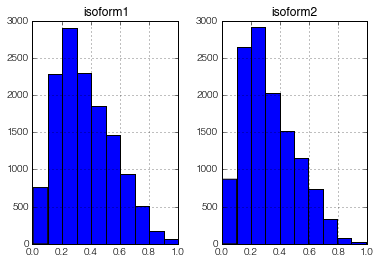

In [8]:
%matplotlib inline 
disordered_scores_df.hist()

In [13]:
disordered_scores_df.columns = disordered_scores_df.columns.map(lambda x: x+'_iupred_mean')

In [14]:
disordered_scores_df.head()

,isoform1_iupred_mean,isoform2_iupred_mean
chr10:100148111:100148265:-@chr10:100147622:100147841:-@chr10:100146958:100147064:-,0.271447,NaN
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,NaN,0.296623
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,NaN,0.341451
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,0.552473,0.638962
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,NaN,0.148576


/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1780: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


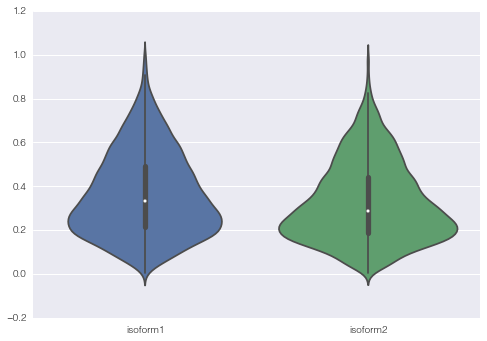

In [10]:
import seaborn as sns
sns.violinplot(disordered_scores_df)

In [4]:
range(3)

[0, 1, 2]

In [2]:
range(3)

[0, 1, 2]